In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [5]:
# Load your dataset 
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Create a new working DataFrame
df_model = df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)

# View first 5 rows
df_model.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [7]:
# Convert Attrition to numeric values
df_model['Attrition'] = df_model['Attrition'].map({'Yes': 1, 'No': 0})

# Check the changes
df_model['Attrition'].value_counts()


Attrition
0    1233
1     237
Name: count, dtype: int64

In [8]:
# Keep a copy of original categorical columns for Power BI
df_original_cols = df[['Department', 'JobRole', 'Gender', 'MaritalStatus', 'OverTime', 'Attrition']]

# Encode only the remaining numerical features
df_encoded_part = pd.get_dummies(df.drop(['Department', 'JobRole', 'Gender', 'MaritalStatus', 'OverTime'], axis=1), drop_first=True)

# Combine both into the final dataset
df_final = pd.concat([df_original_cols, df_encoded_part], axis=1)

# Preview the final dataset (replace df_encoded.head())
df_final.head()



,Department,JobRole,Gender,MaritalStatus,OverTime,Attrition,Age,DailyRate,DistanceFromHome,Education,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,Sales,Sales Executive,Female,Single,Yes,Yes,41,1102,1,2,...,0,5,True,False,True,True,False,False,False,False
1,Research & Development,Research Scientist,Male,Married,No,No,49,279,8,1,...,1,7,False,True,False,True,False,False,False,False
2,Research & Development,Laboratory Technician,Male,Single,Yes,Yes,37,1373,2,2,...,0,0,True,False,True,False,False,False,True,False
3,Research & Development,Research Scientist,Female,Married,Yes,No,33,1392,3,4,...,3,0,False,True,False,True,False,False,False,False
4,Research & Development,Laboratory Technician,Male,Married,No,No,27,591,2,1,...,2,2,False,False,True,False,False,True,False,False


In [21]:
y = df_final['Attrition']
X = df_final.drop('Attrition', axis=1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1470, 39)
Shape of y: (1470,)


In [22]:
#  Split the data for training/testing

from sklearn.model_selection import train_test_split

# Use stratify=y to maintain balance of classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Confirm the split
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 1176
Testing samples: 294


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)




model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)




In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00

Confusion Matrix:
[[247   0]
 [  0  47]]

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       247
         Yes       1.00      1.00      1.00        47

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [24]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0
[[247   0]
 [  0  47]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       247
         Yes       1.00      1.00      1.00        47

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
[[247   0]
 [  0  47]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       247
         Yes       1.00      1.00      1.00        47

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [14]:
import pandas as pd

model_metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [0.86, 0.76, 0.83],
    "Recall (Class 1)": [0.34, 0.36, 0.11],
    "F1 Score (Class 1)": [0.44, 0.32, 0.17]
})
model_metrics


,Model,Accuracy,Recall (Class 1),F1 Score (Class 1)
0,Logistic Regression,0.86,0.34,0.44
1,Decision Tree,0.76,0.36,0.32
2,Random Forest,0.83,0.11,0.17


In [26]:
!pip install shap



 97%|=================== | 570/588 [00:16<00:00]       

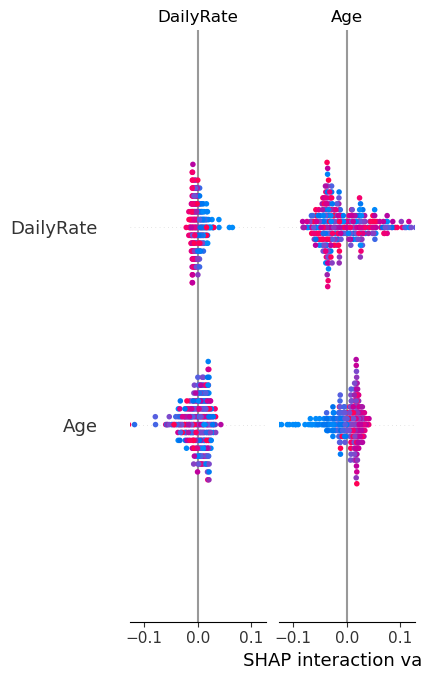

In [18]:
import shap

# Create TreeExplainer using best model (e.g., Random Forest)
explainer = shap.Explainer(rf_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [28]:
df_final.to_csv(r"C:\Users\LENOVO\Downloads\Cleaned_HR_Attrition.csv", index=False)


### 🔍 SHAP Value Summary (Model Explainability)
The SHAP summary plot reveals that **DailyRate** and **Age** are two major features influencing attrition. Employees with certain daily rates or younger age ranges may be more likely to leave, indicating a potential dissatisfaction linked to compensation and experience.
